Descente de gradient: Exemples
===============================

**Author:** V. Ledda



---



## Préparation



In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "#A4B9C5"
c_orange="#FF9A00"
c_darkblue="#5A7F96"

In [2]:
import ipywidgets as widgets
from ipywidgets import *

## Descente de gradient



### Descente de gradient en dimension 1



In [4]:
u=np.arange(-2,2,0.1)
v=[X**2 for X in u]

In [5]:
# -*- coding: utf-8 -*-
def dgfD1(f,x0=np.random.rand(),pas=1e-1,maxIter=500,epsilon=1e-8):
    
    x=np.ndarray((maxIter,1))
    x[0]=x0


    for n in range(maxIter-1):
          x[n+1]=x[n]-pas*f(x[n])
          if  la.norm(x[n+1]-x[n])<epsilon:
              print(f"L'algorithme a convergé en {n+1} itérations".encode('utf-8'))
              break
    if n==maxIter-2:
      print(u"L'algorithme n'a pas convergé")
    return(x[:n],n)

In [6]:
def g(x):
    return (x-1)*(x-2)*(x-3)*(x-5)
def dg(x):
    return  4*x**3-33*x**2 +82*x-61
u=np.arange(0,6,0.1)
v=[g(X) for X in u]

In [7]:
x,n=dgfD1(dg,x0=4.9,pas=0.045)
y=[g(X) for X in x]

b"L'algorithme a converg\xc3\xa9 en 9 it\xc3\xa9rations"


In [8]:
@interact
def anim(vInit=FloatSlider(min=0,max=8,value=2.55,step=0.05,description="x0"),vpas=FloatSlider(min=1e-3,max=1,value=0.2,step=0.01,description="pas")):
    x,n=dgfD1(dg,x0=vInit,pas=vpas)
    y=[g(X) for X in x]
    fig, ax = plt.subplots()
    ax.plot(u,v,color=c_darkblue)
    ax.plot(x,y,color=c_orange)
    ax.set_aspect('auto')
    ax.set_ylim(ymin=-7.5,ymax=5)
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=2.55, description='x0', max=8.0, step=0.05), FloatSlider(value=0.2, de…

### Descente de gradient en dimension 2



#### Fonctions et graphe



Définition de la fonction et de son gradient



In [9]:
def gf(x):
     return np.array([-2*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+2*x[0]*(x[1]**2-x[0]-1)**2+2*x[0],4*x[1]*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+(x[1]**2-x[0]-1)**2-2])
def g(x,y): 
     return (x**(2)+y-2)*(y**(2)-x-1)**(2)+x**(2)-2*y+2

Représentation en trois dimensions de la fonction:



In [12]:
   xmin=-1
   xmax=2.3
   ymin=-1
   ymax=2.5
   delta=0.1
   X=np.arange(xmin,xmax,delta)
   Y=np.arange(ymin,ymax,delta)
   U, V = np.meshgrid(X, Y)
   Z=g(U,V)

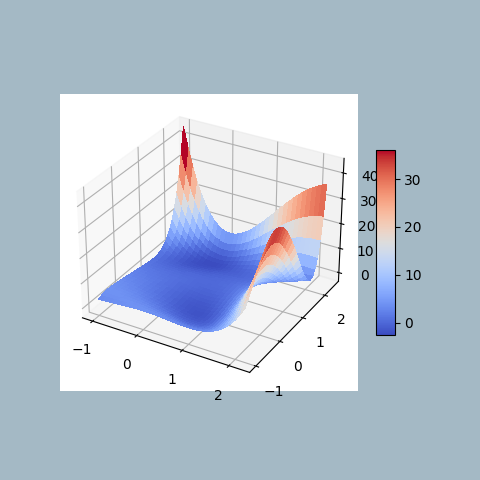

In [13]:
  %matplotlib ipympl
  
  X=np.arange(xmin,xmax,delta)
  Y=np.arange(ymin,ymax,delta)
  U, V = np.meshgrid(X, Y)
  Z=g(U,V)
  
  fig = plt.figure(figsize=plt.figaspect(1))
  ax = fig.add_subplot(1, 1, 1, projection='3d')

  # plot a 3D surface like in the example mplot3d/surface3d_demo

  surf = ax.plot_surface(U, V, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                         linewidth=0, antialiased=False)
  #ax.set_zlim(-1.01, 1.01)

  fig.colorbar(surf, shrink=0.5, aspect=10)


  plt.show()

#### Descente de gradient



In [14]:
def dgfD2(f,x0=np.random.rand(2,),pas=1e-1,maxIter=500,epsilon=1e-8):
    
    x=np.ndarray((maxIter,2))
    x[0]=x0

    
    for n in range(maxIter-1):
          x[n+1]=x[n]-pas*f(x[n])
          if  la.norm(x[n+1]-x[n])<epsilon:
              print(f"L'algorithme a convergé en {n+1} itérations")
              break  
    if n==maxIter-2:
      print("L'algorithme n'a pas convergé")
    return(x[:n,:],n)

In [15]:
x,n=dgfD2(gf,x0=[1.5,-0.5],pas=0.09,epsilon=1e-8)

L'algorithme a convergé en 25 itérations


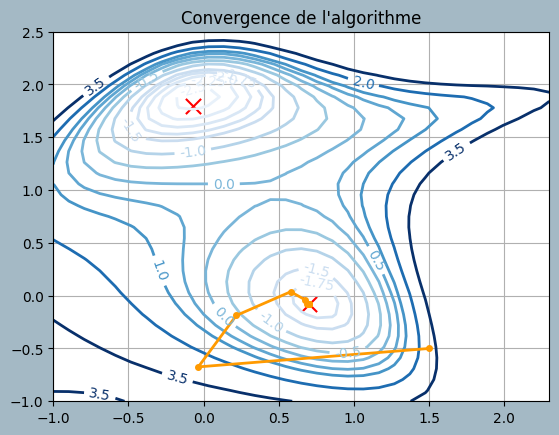

In [18]:
  %matplotlib inline
  fig, ax = plt.subplots()

  levels =[-3,-2.5,-2.25,-2,-1.75,-1.5,-1,-0.5,0,0.5, 1, 2,3.5]
  CS = ax.contour(Z, levels,
                    #origin ='lower',
                    cmap ='Blues',
                    linewidths = 2,
                    extent =(xmin, xmax, ymin, ymax))
  fmt = {}

  for l in CS.levels:
     fmt[l] = str(l)
  plt.clabel(CS, CS.levels, inline = True,
             fmt = fmt, fontsize = 10)
  nb=n
  a = x[0:nb,0]
  b = x[0:nb,1]
  ax.plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

  plt.title("Convergence de l'algorithme")
  plt.scatter([0.697834130837,-0.0727200623758],[-0.0798903939832,1.79594746628],color='red',s=120,marker='x')
  plt.grid(True)
  plt.show()

#### Version interactive



In [19]:
  @interact
  def anim(uInit=FloatSlider(min=-1,max=2,value=0.55,step=0.05,description="x0"),vInit=FloatSlider(min=-1,max=2,value=0.55,step=0.05,description="y0"),vpas=FloatSlider(min=1e-5,max=1,value=0.01,step=0.01,description="pas")):
      x,n=dgfD2(gf,x0=[uInit,vInit],pas=vpas,epsilon=1e-6)
      levels =[-3,-2.5,-2.25,-2,-1.75,-1.5,-1,-0.5,0,0.5, 1, 2,3.5]
      fig, ax = plt.subplots()
      CS = ax.contour(Z, levels,
                    #origin ='lower',
                    cmap ='Blues',
                    linewidths = 2,
                    extent =(xmin, xmax, ymin, ymax))
      plt.clabel(CS, CS.levels, inline = True,
             fmt = fmt, fontsize = 10)
      nb=n
      a = x[0:nb,0]
      b = x[0:nb,1]
      ax.plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

      plt.title("Convergence de l'algorithme")
      plt.scatter(x[0,0],x[0,1],color='green',s=120,marker='o')
      plt.scatter([0.697834130837,-0.0727200623758],[-0.0798903939832,1.79594746628],color='red',s=120,marker='x')
      plt.grid(True)
      plt.show()

interactive(children=(FloatSlider(value=0.55, description='x0', max=2.0, min=-1.0, step=0.05), FloatSlider(val…

## Descente de gradient à pas optimal



### Préparation



On utilise `scipy` pour résoudre le problème d'optimisation en une
dimension. Plus précisément, il s'agit de déterminer le minimum de  
 $h\longmapsto   f(x-h\cdot gf(x))$.



In [20]:
from scipy.optimize import minimize_scalar

In [21]:
def paso(x,f,gf,emin,emax):
       p=emax
       def of(h):
         return f(x[0]-h*gf(x)[0],x[1]-h*gf(x)[1])
       res=minimize_scalar(of,bounds=(emin,emax), method='bounded' )
       if res['success']==True:
         p=res['x']

       return p

### Fonction de Rosenbrok



#### Présentation de la fonction



[Rosenbrock](../../../Memo/roam/20220510114235-rosenbrock.md)



In [23]:
     xmin=-2
     xmax=2
     ymin=-0.5
     ymax=3

     delta=0.1


     def f(x,y):
	  return((1-x)**2+100*(y-x**2)**2)
     def gf(x):
	  return np.array([-2*(1-x[0])-400*(x[1]-x[0]**2)*x[0],200*(x[1]-x[0]**2)])
     X=np.arange(xmin,xmax,delta)
     Y=np.arange(ymin,ymax,delta)
     U, V = np.meshgrid(X, Y)
     Z=f(U,V)

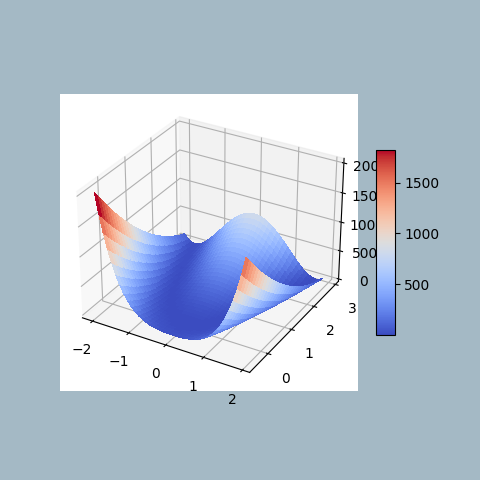

In [24]:
     %matplotlib ipympl
     fig = plt.figure(figsize=plt.figaspect(1))
     ax = fig.add_subplot(1, 1, 1, projection='3d')

     # plot a 3D surface like in the example mplot3d/surface3d_demo

     surf = ax.plot_surface(U, V, Z,
			    rstride=1,
			    cstride=1,
			    cmap=cm.coolwarm,
			    linewidth=0,
			    antialiased=False)
     #ax.set_zlim(-1.01, 1.01)

     fig.colorbar(surf, shrink=0.5, aspect=10)

     plt.show()

#### Comparaison descente de gradient et descente de gradient optimale



##### Une première approche par descente de gradient



Valeur initiale:



In [25]:
x0=np.random.rand(2,)
nbIter=1500
epsilon=1e-9
pas=2*1e-3

Convergence en 71 itérations: 0.6136884945571979 , 0.3747180759335793, 


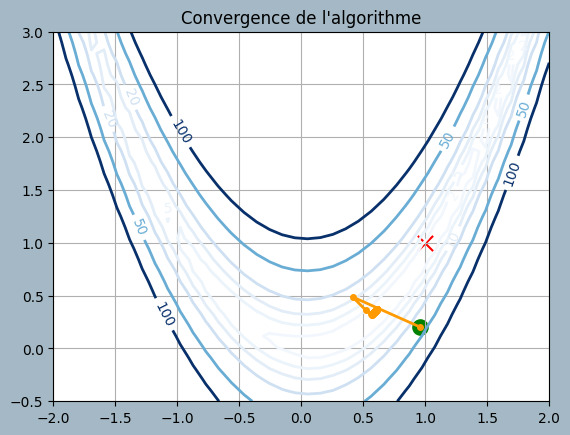

In [26]:
     %matplotlib inline
     x=np.ndarray((nbIter,2))
     x[0]=x0

     n=0

     while n<nbIter-1 and  la.norm(x[n+1]-x[n])>epsilon:
       x[n+1]=x[n]-pas*gf(x[n])
       n=n+1

     print(f"Convergence en {n-1} itérations: {x[n-1][0]} , {x[n-1][1]}, ")

     fig, ax = plt.subplots()

     levels =[-1,0,2,5,10,20,50,100]
     CS = ax.contour(Z, levels,
                  #origin ='lower',
                  cmap ='Blues',
                  linewidths = 2,
                  extent =(xmin, xmax, ymin, ymax))
     fmt = {}

     for l in CS.levels:
         fmt[l] = str(int(l))
     plt.clabel(CS, CS.levels, inline = True,
                    fmt = fmt, fontsize = 10)
     nb=n
     a = x[0:nb,0]
     b = x[0:nb,1]
     ax.plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

     plt.title("Convergence de l'algorithme")
     plt.scatter(1,1,color='red',s=120,marker='x')
     plt.scatter(x[0][0],x[0][1],color='green',s=120,marker='o')
     plt.grid(True)
     plt.show()

La convergence est très lente. L'"algorithme" reste bloqué dans le creux de la vallée.



##### Descente de gradient à pas optimal



Convergence en 1127 itérations: 0.8944286886578938 , 0.7995527562548276, 


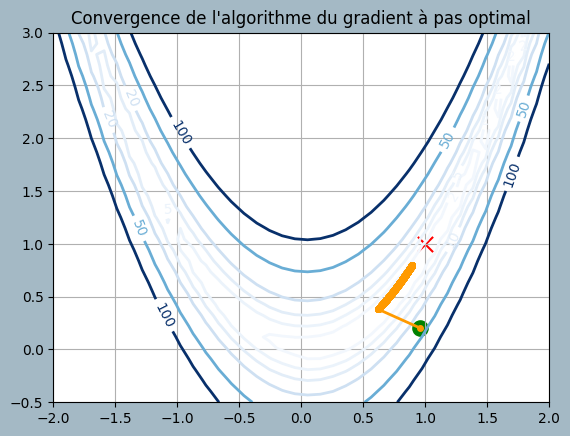

In [28]:
      x=np.ndarray((nbIter,2))
      x[0]=x0



      n=0
      paos=[]
      while n<nbIter-1 and  la.norm(x[n+1]-x[n])>epsilon:
        pao=paso(x[n],f,gf,0,pas)
        paos.append(pao)
        x[n+1]=x[n]-pao*gf(x[n])
        n=n+1

      print(f"Convergence en {n-1} itérations: {x[n-1][0]} , {x[n-1][1]}, ")

      fig, ax = plt.subplots()

      levels =[-1,0,2,5,10,20,50,100]
      CS = ax.contour(Z, levels,
                   #origin ='lower',
                   cmap ='Blues',
                   linewidths = 2,
                   extent =(xmin, xmax, ymin, ymax))
      fmt = {}

      for l in CS.levels:
          fmt[l] = str(int(l))
      plt.clabel(CS, CS.levels, inline = True,
                     fmt = fmt, fontsize = 10)
      nb=n
      a = x[0:nb,0]
      b = x[0:nb,1]
      ax.plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

      plt.title("Convergence de l'algorithme du gradient à pas optimal")
      plt.scatter(1,1,color='red',s=120,marker='x')
      plt.scatter(x[0][0],x[0][1],color='green',s=120,marker='o')
      plt.grid(True)
      plt.show()

##### Une version dynamique



Valeur initiale:



In [29]:
x0=np.random.rand(2,)
NbIter=1500
epsilon=1e-9
pas=2*1e-2

In [30]:
def dgfD2(gf,x0=np.random.rand(2,),pas=1e-1,maxIter=500,epsilon=1e-8):
    """
    Descente de gradient en deux dimensions
    :param gf: la fonction gradient
    :param x0: valeur initiale np.array
    :param pas: float
    :param epsilon: float
    :param maxIter: entier

    """

    x=np.ndarray((maxIter+1,2))
    x[0]=x0


    for n in range(maxIter):
          x[n+1]=x[n]-pas*gf(x[n])
          if  la.norm(x[n+1]-x[n])<epsilon:
              print(f"L'algorithme a convergé en {n+1} itérations")
              break
    if n==maxIter-1:
      print("L'algorithme n'a pas convergé")
    return(x[:n,:],n)

In [31]:
def dgfD2po(f,gf,x0=np.random.rand(2,),pas=1e-1,maxIter=500,epsilon=1e-8):
    """
    Descente de gradient à pas optimal  en deux dimensions
    :param f: la fonction à minimiser
    :param gf: la fonction gradient
    :param x0: valeur initiale np.array
    :param pas: float
    :param epsilon: float
    :param maxIter: entier

    """
    x=np.ndarray((maxIter+1,2))
    x[0]=x0


    for n in range(maxIter):
          pao=paso(x[n],f,gf,0,pas)
          x[n+1]=x[n]-pao*gf(x[n])
          if  la.norm(x[n+1]-x[n])<epsilon:
              print(f"L'algorithme à pas optimal a convergé en {n+1} itérations")
              break
    if n==maxIter-1:
      print("L'algorithme n'a pas convergé")
    return(x[:n,:],n)


Création de l'animation



In [33]:
   levels =[-1,0,2,5,10,20,50,100]



   def anim(uInit=FloatSlider(min=-1,max=2,value=1,step=0.05,description="x0"),
            vInit=FloatSlider(min=-0.4,max=2,value=-0.2,step=0.05,description="y0"),
            vpas=FloatSlider(min=1e-5,max=1e-2,value=0.00468,step=0.00001,description="pas",readout=True,
       readout_format='.5f')):

       fig, axs = plt.subplots(1,2,figsize=(16,8))
       # Descente de gradient

       CS = axs[0].contour(Z, levels,
                    #origin ='lower',
                    cmap ='Blues',
                    linewidths = 2,
                    extent =(xmin, xmax, ymin, ymax))
       fmt = {}

       for l in CS.levels:
           fmt[l] = str(int(l))
       plt.clabel(CS, CS.levels, inline = True,
                      fmt = fmt, fontsize = 10)

       x=np.ndarray((nbIter,2))
       x,n=dgfD2(gf,x0=[uInit,vInit],pas=vpas,maxIter=nbIter,epsilon=epsilon)
       nb=n
       a = x[0:nb,0]
       b = x[0:nb,1]
       axs[0].plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

       axs[0].set_title("Convergence de l'algorithme du gradient")
       axs[0].scatter(1,1,color='red',s=120,marker='x')
       axs[0].scatter(x[0][0],x[0][1],color='green',s=120,marker='o')
       axs[0].grid(True)
       axs[0].set_aspect('equal', 'box')
       # Descente de gradient à pas optimal
       x=np.ndarray((nbIter,2))
       x,n=dgfD2po(f,gf,x0=[uInit,vInit],pas=vpas,maxIter=nbIter,epsilon=epsilon)
       nb=n
       a = x[0:nb,0]
       b = x[0:nb,1]

       CS = axs[1].contour(Z, levels,
                    #origin ='lower',
                    cmap ='Blues',
                    linewidths = 2,
                    extent =(xmin, xmax, ymin, ymax))
       fmt = {}

       for l in CS.levels:
           fmt[l] = str(int(l))
       plt.clabel(CS, CS.levels, inline = True,
                      fmt = fmt, fontsize = 10)

       axs[1].plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

       axs[1].set_title("Convergence de l'algorithme du gradient à pas optimal")
       axs[1].scatter(1,1,color='red',s=120,marker='x')
       axs[1].scatter(x[0][0],x[0][1],color='green',s=120,marker='o')
       axs[1].grid(True)
       axs[1].set_aspect('equal', 'box')
       plt.show()

In [35]:
w=interactive(anim)
w

interactive(children=(FloatSlider(value=1.0, description='x0', max=2.0, min=-1.0, step=0.05), FloatSlider(valu…

### Orthogonalité.



Lors d'une descente à pas optimal, les directions successives sont
orthogonales:



L'algorithme à pas optimal a convergé en 15 itérations


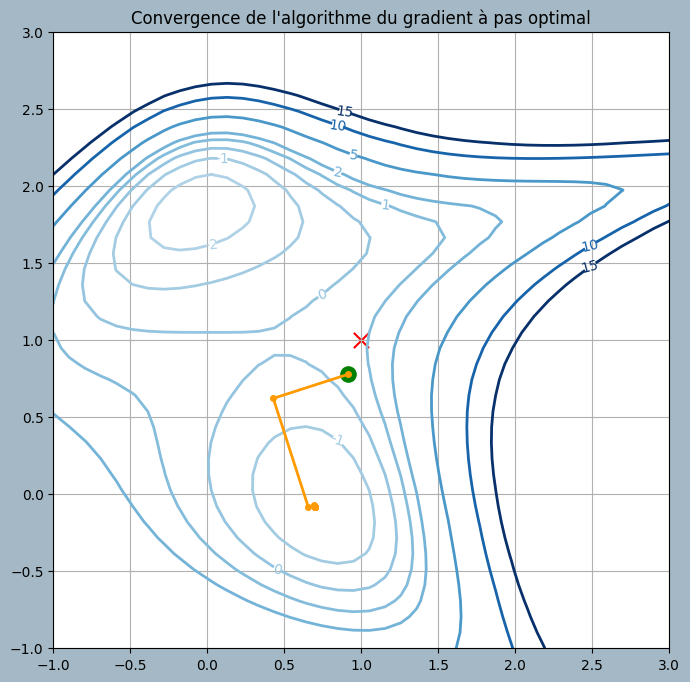

In [36]:
  xmin=-1
  xmax=3
  ymin=-1
  ymax=3
  delta=0.1

  pas =1

  
  def gf(x):
       return np.array([-2*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+2*x[0]*(x[1]**2-x[0]-1)**2+2*x[0],4*x[1]*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+(x[1]**2-x[0]-1)**2-2])
  def f(x,y):
       return (x**(2)+y-2)*(y**(2)-x-1)**(2)+x**(2)-2*y+2

  X=np.arange(xmin,xmax,delta)
  Y=np.arange(ymin,ymax,delta)
  U, V = np.meshgrid(X, Y)
  Z=f(U,V)   

  levels =[-10,-2,-1,0,1,2,5,10,15]

  fig, axs = plt.subplots(1,1,figsize=(20,8))
      # Descente de gradient

  CS = axs.contour(Z, levels,
               #origin ='lower',
               cmap ='Blues',
               linewidths = 2,
               extent =(xmin, xmax, ymin, ymax))
  fmt = {}

  for l in CS.levels:
      fmt[l] = str(int(l))
  plt.clabel(CS, CS.levels, inline = True,
                 fmt = fmt, fontsize = 10)


  x,n=dgfD2po(f,gf,x0=x0,pas=pas,maxIter=nbIter,epsilon=epsilon)
  nb=n
  a = x[0:nb,0]
  b = x[0:nb,1]
  axs.plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

  axs.set_title("Convergence de l'algorithme du gradient à pas optimal")
  axs.scatter(1,1,color='red',s=120,marker='x')
  axs.scatter(x[0][0],x[0][1],color='green',s=120,marker='o')
  axs.grid(True)
  axs.set_aspect('equal', 'box')


  plt.show()

## SGD



### Présentation



Illustration de la descente de gradient stochastique en deux
dimensions



In [37]:
from random import randint
from math import log

### Détermination de l'échéancier



On va diminuer le pas à mesure que l'on se rapproche du minimum



In [38]:
def eche(n):
      return log(n+500)/(n+5)**(3/5)

### Illustration



In [39]:
xmin=-1
xmax=2.3
ymin=-1
ymax=2
delta=0.1
def g(x,y):
     return (x**(2)+y-2)*(y**(2)-x-1)**(2)+x**(2)-2*y+2
X=np.arange(xmin,xmax,delta)
Y=np.arange(ymin,ymax,delta)
U, V = np.meshgrid(X, Y)
Z=g(U,V)

# gradient
def gf(x):
     return np.array([-2*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+2*x[0]*(x[1]**2-x[0]-1)**2+2*x[0],4*x[1]*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+(x[1]**2-x[0]-1)**2-2])
      
#gradient stochastique
def gfs(x):
     if randint(0,1) == 0:
          return np.array([-2*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+2*x[0]*(x[1]**2-x[0]-1)**2+2*x[0],0])
     else:
       return np.array([0,4*x[1]*(x[0]**2+x[1]-2)*(x[1]**2-x[0]-1)+(x[1]**2-x[0]-1)**2-2])

Algorithme du gradient stochastique:



In [40]:
def sdgD2(gfs,x0=np.random.rand(2,),pas=1e-1,maxIter=500,epsilon=1e-8):
      """
      Descente de gradient en deux dimensions
      :param gfs: la fonction gradient stochastique
      :param x0: valeur initiale np.array
      :param pas: float
      :param epsilon: float
      :param maxIter: entier

      """

      x=np.ndarray((maxIter+1,2))
      x[0]=x0


      for n in range(maxIter):

            x[n+1]=x[n]-pas*gfs(x[n])*eche(n)
            if  la.norm(x[n+1]-x[n])<epsilon:
                print(f"L'algorithme a convergé en {n+1} itérations")
                break
      if n==maxIter-1:
        print("L'algorithme n'a pas convergé")
      return(x[:n,:],n)

In [45]:
levels =[-5,-4,-3,-2,-1,0,0.5,1,2,5,10]



def anim(uInit=FloatSlider(min=-1,max=2,value=1.6,step=0.05,description="x0"),
          vInit=FloatSlider(min=-0.4,max=2,value=1.15,step=0.05,description="y0"),
         vpas=FloatSlider(min=1e-5,max=1e-1,value=0.0368,step=0.00001,description="pas",readout=True,
     readout_format='.5f')):
     
     fig, axs = plt.subplots(1,1,figsize=(12,8))

     # Descente de gradient à pas optimal
     x=np.ndarray((nbIter,2))
     x,n=sdgD2(gfs,x0=[uInit,vInit],pas=vpas,maxIter=nbIter,epsilon=epsilon)
     nb=n
     a = x[0:nb,0]
     b = x[0:nb,1]

     CS = axs.contour(Z, levels,
                  #origin ='lower',
                  cmap ='Blues',
                  linewidths = 2,
                  extent =(xmin, xmax, ymin, ymax))
     fmt = {}

     for l in CS.levels:
         fmt[l] = str(l)
     plt.clabel(CS, CS.levels, inline = True,
                    fmt = fmt, fontsize = 10)

     axs.plot(a, b,linewidth=2,marker='o',color=c_orange,markersize=4)

     axs.set_title("Algorithme du gradient stochastique")
     axs.scatter(-0.07272,1.795947,color='red',s=120,marker='x')
     axs.scatter(0.6978,-0.07989,color='blue',s=120,marker='x')
     axs.scatter(x[0][0],x[0][1],color='green',s=120,marker='o')
     axs.grid(True)
     axs.set_aspect('equal', 'box')
     plt.show()

In [46]:
w=interactive(anim)
w

interactive(children=(FloatSlider(value=1.6, description='x0', max=2.0, min=-1.0, step=0.05), FloatSlider(valu…